In [56]:
!pip install seaborn

  Using cached seaborn-0.7.1.tar.gz
  Running setup.py bdist_wheel for seaborn: started
  Running setup.py bdist_wheel for seaborn: finished with status 'done'
  Stored in directory: C:\Users\Python2\AppData\Local\pip\Cache\wheels\cb\c8\67\83d615c0ef9b529558525aa521025b183de8c5b156799b091e
Successfully built seaborn


In [57]:
import pandas as pd
import numpy as np
from __future__ import division 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from __future__ import unicode_literals
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler  
# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
# import sys
# reload(sys)
# sys.setdefaultencoding("utf-8")

In [47]:
ta1.head(n=10)

,Query,CTR1,CTR2,CTR3,CTR4,CTR5,CTR6,CTR7,CTR8,CTR9,CTR10,nctr,pred,skips,zeros,diffs,true,clust_predict,norm_diffs
0,ярмарка выходного дня,31.914894,17.021277,8.510638,10.638298,2.127660,10.638298,6.382979,10.638298,8.510638,2.127660,0.294118,0,0,0,0.148936,0,1,0.466667
1,ярмарка,48.734177,6.329114,13.924051,10.759494,9.493671,6.329114,9.493671,6.329114,2.531646,1.898734,0.420765,0,0,0,0.348101,0,1,0.714286
2,яндекс,5.202312,2.890173,1.156069,1.734104,0.578035,0.000000,0.578035,0.578035,0.000000,0.000000,0.409091,0,0,3,0.023121,0,1,0.444444
3,янао,18.518518,11.111111,18.518518,11.111111,11.111111,7.407407,0.000000,0.000000,0.000000,3.703704,0.227273,0,0,3,0.074074,0,1,0.400000
4,якутия,6.666667,6.666667,3.333333,3.333333,0.000000,3.333333,3.333333,3.333333,0.000000,0.000000,0.222222,0,0,3,0.033333,0,1,0.500000
5,як-7-8/393,98.850575,5.747126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.945055,0,0,8,0.931034,1,0,0.941860
6,як-7-8/392,88.135593,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1,0,9,0.881356,1,0,1.000000
7,як-7-6/488,89.795918,12.244898,2.040816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.862745,0,0,7,0.775510,1,0,0.863636
8,як-7-1/9,90.163934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1,0,9,0.901639,1,0,1.000000
9,яйцо,0.000000,8.823529,2.941177,0.000000,0.000000,2.941177,0.000000,0.000000,0.000000,2.941177,0.500000,0,1,6,0.058824,0,0,0.666667


In [76]:
writer = pd.ExcelWriter('output.xlsx')
ta1.to_excel(writer,'Sheet1')
writer.save()

In [29]:
ta1=pd.read_excel('table_1.xlsx')
ta1['nctr']=0
ta1['pred']=0
ta1['skips']=0
ta1['zeros']=0
ta1['diffs']=0
ta1['norm_diffs']=0
ta2=pd.read_excel('table_2.xlsx')
ta3=pd.read_excel('table_3.xlsx')
cleanup_nums = {"type":{"nonav": 0, "nav": 1}}
ta3.replace(cleanup_nums,inplace=True)
ta1['true']=ta3.type

В данном задании основной упор мною был сделан на таблицу 2, где хранятся ctr первых десяти ссылок.

Для решения задачи кластеризации нам необходимо сгенерировать несколько значимых "фичей", по которым будет проихводиться кластеризация.

Фича 1: Отношение максильманого ctr к сумме ctr десяти ссылок по данному запросу

In [7]:
def calculate_pred(ta1):
    for k,n in ta1.iterrows():
        sumrow=np.sum(n[1:11])
    #     print (sumrow)
    #     print (np.max(n[1:].values/sumrow))
        if(sumrow!=0):
    #         print (np.max(n[1:11].values) , np.log(np.max(n[1:11].values)), np.log(sumrow))
#             ta1.iloc[k,11]=(np.log(np.max(n[1:11].values))/np.log(sumrow))
              ta1.iloc[k,11]=(np.max(n[1:11].values)/sumrow)
        else:
            ta1.iloc[k,11]=0
    #     print (n[1:].values)
    #     for 
#     for k in range(0,len(ta1)):
#         if(ta1.iloc[k,11]>=threshold):
#             ta1.iloc[k,12]=1
#         else:
#             ta1.iloc[k,12]=0

In [8]:
calculate_pred(ta1)

Фича 2: Количетсво пропущенных ссылок до первой нажатой

In [9]:
def calculate_skips():
    for k,n in ta1.iterrows():
        num_zer=0
        for z in range(1,11):
            if (n[z])==0:
                num_zer+=1
            else:
                break
        ta1.ix[k,"skips"]=num_zer

In [10]:
calculate_skips()

Фича 3: Разница между соседними ctr

In [11]:
def calculate_diffs():
    for k,n in ta1.iterrows():
        max_dif=np.max(np.abs(np.diff(np.sort(n[1:11]))))
        ta1.ix[k,"diffs"]=max_dif
#     ta1["diffs"]=np.power(ta1["diffs"].values,2)

In [12]:
def calculate_norm_diffs():
    for k,n in ta1.iterrows():
        if(np.max(n[1:11])>0):
            max_dif=np.log(np.max(np.abs(np.diff(np.sort(n[1:11])))))/np.log(np.max(n[1:11]))
            ta1.ix[k,"norm_diffs"]=max_dif
        else:
            ta1.ix[k,"norm_diffs"]=0
#     ta1["diffs"]=np.power(ta1["diffs"].values,2)

In [13]:
ta1["diffs"]=np.divide(ta1["diffs"].values,100)

In [14]:
calculate_diffs()

In [17]:
calculate_norm_diffs()

Фича 4: Количество пропущенных значений

In [15]:
def calculate_zeros():
     for k,n in ta1.iterrows():
        ta1.ix[k,"zeros"]=list((n[1:11].values)).count(0)

In [16]:
calculate_zeros()

In [37]:
k2=[str(x).lower() for x in ta1.iloc[:,0].unique().tolist()]
k3=[str(x).lower() for x in ta2.iloc[:,0].unique().tolist()]
n=0
for k in k2:
    if (k not in k3):
#         print (k)
        n+=1
    
print (n)
# len(ta3.iloc[:,0].unique())

2862


# Кластеризация

В результате анализа было выявлено, что наибольшая прирост точности кластеризация дает на фичах (3) и (4)

Перед кластеризацией используем StandardScaler() для нормировки фич.

In [49]:
km=KMeans(init='k-means++',random_state=241,n_clusters=2)
km.fit(StandardScaler().fit_transform(X=(ta1.ix[:,['norm_diffs','zeros']])))

KMeans(algorithm='auto', copy_x=True, init=u'k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=241, tol=0.0001, verbose=0)

In [72]:
ta1=ta1.drop(ta1.ix['clust_predict'])

In [75]:
ta1.ix[:,'clust_predict']=res

In [50]:
res=km.predict(StandardScaler().fit_transform(ta1.ix[:,['norm_diffs','zeros']]))

In [42]:
def plot_confusion_matrix(y_true, y_pred, title = 'Confusion matrix', cmap=plt.cm.Blues):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print 'Classification Report:\n'
    print classification_report(ta1.true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    def plot_confusion_matrix_plot(cm, title = 'Confusion matrix', cmap=plt.cm.Blues):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(ta1.true.unique()))
        plt.xticks(tick_marks, rotation=45)
        plt.yticks(tick_marks)
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    
    print '\n Confusion matrix, without normalization: \n'
    print cm
    plot_confusion_matrix_plot(cm=cm)
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('\n Normalized confusion matrix \n')
    print(cm_normalized)
    plt.figure()
    plot_confusion_matrix_plot(cm_normalized, title='Normalized confusion matrix')


Результаты приведены для обычной и нормированной версии фичи (3).

Classification Report:

             precision    recall  f1-score   support

          0       0.86      0.92      0.89     34765
          1       0.82      0.71      0.76     18516

avg / total       0.84      0.85      0.84     53281


 Confusion matrix, without normalization: 

[[31837  2928]
 [ 5321 13195]]

 Normalized confusion matrix 

[[ 0.91577736  0.08422264]
 [ 0.28737308  0.71262692]]


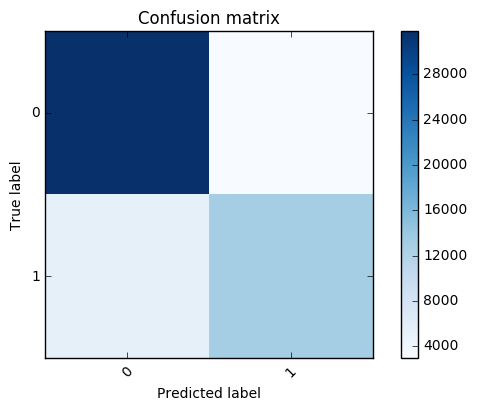

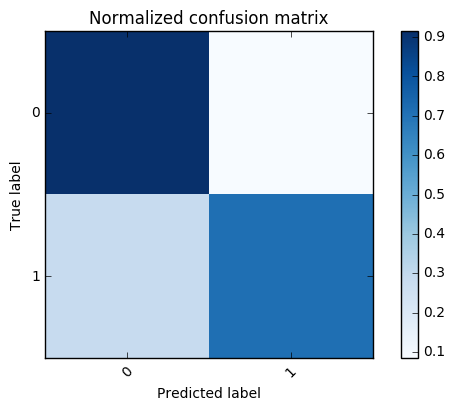

In [48]:
plot_confusion_matrix(ta1.true,res)

Classification Report:

             precision    recall  f1-score   support

          0       0.88      0.87      0.87     34765
          1       0.76      0.78      0.77     18516

avg / total       0.84      0.84      0.84     53281


 Confusion matrix, without normalization: 

[[30078  4687]
 [ 4019 14497]]

 Normalized confusion matrix 

[[ 0.8651805   0.1348195 ]
 [ 0.21705552  0.78294448]]


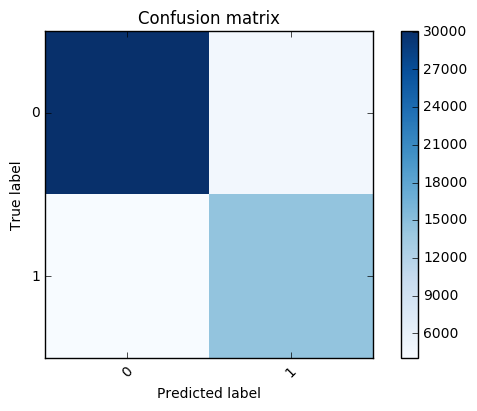

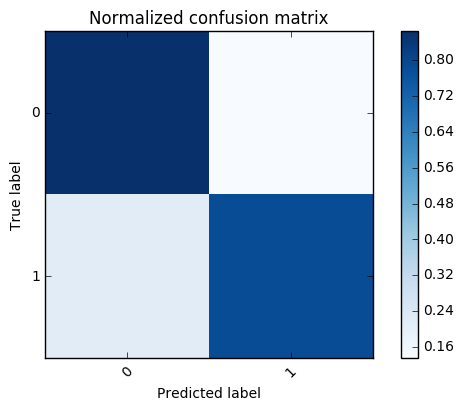

In [51]:
plot_confusion_matrix(ta1.true,res)

Результаты приведены для двух случаев т.к. их поведение немного отличается. Нормированный вариант более лоялен, и в результате вместе с увеличением правильных ответов появляется больше ошибок (False Positive), в отличие от обычного варианта, который выдает чуть меньше правильных ответов, но и часть ошибок (FP) переходит в (False Negative) 

В результате точность получилась  в районе 86-88%, что само по себе не так плохо для такого небольшого количества фичей. У меня не очень большой опыт в генерации новых параметров для модели, поэтому скорее всего я упустил какую-то очень важную деталь.

Основные расхождения у меня были в запросах, где кликовая статистика не соответствовала, как мне казалось, типу запроса. 
Например: запрос "юридическое лицо", появляющийся дважды имел два варианта кликовой статистики. И тот вариант, где людей почти стабильно удовлетворяла первая ссылка, являлся ненавигационным. Или запрос "порядок уничтожения документов", по которому пользователей, как правило, удовлетворяла первая ссылка. На мой взгляд, для таких запросов вычисление "навигационности" должно происходить с использованием семантической обработки текста(NLP).

In [58]:
def plot_clusters_k_means(data):
    start_time = time.time()
    labels = KMeans(init='k-means++',random_state=241,n_clusters=2).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str('K-Means')), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

Не очень информативный график кластеризации:)

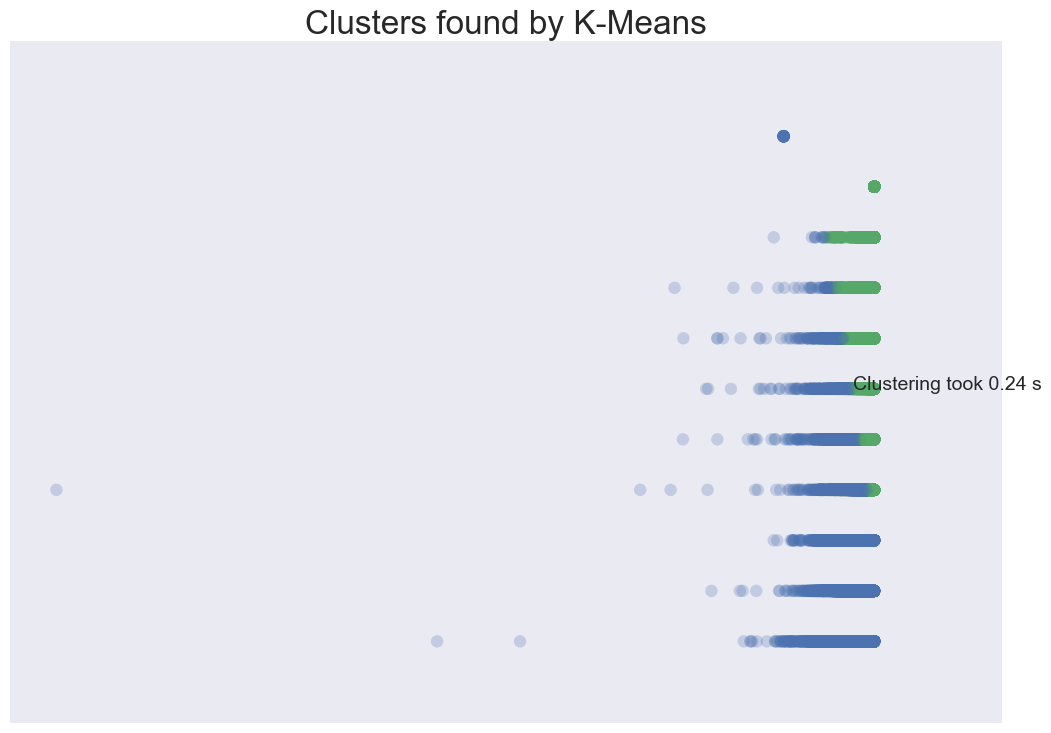

In [59]:
plot_clusters_k_means(preprocessing.scale(ta1.ix[:,['norm_diffs','zeros']]))

In [13]:
import gc
gc.collect()

0